In [266]:
import pandas as pd
import numpy as np
import ast
import re
pd.set_option('display.max_columns', None)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
business = pd.read_csv('../dataset/processed/business.csv')
business.shape

(3829, 14)

In [3]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [4]:
business = business[business['is_open']==1]

In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2412 entries, 0 to 3828
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   2412 non-null   object 
 1   name          2412 non-null   object 
 2   address       2400 non-null   object 
 3   city          2412 non-null   object 
 4   state         2412 non-null   object 
 5   postal_code   2412 non-null   float64
 6   latitude      2412 non-null   float64
 7   longitude     2412 non-null   float64
 8   stars         2412 non-null   float64
 9   review_count  2412 non-null   int64  
 10  is_open       2412 non-null   int64  
 11  attributes    2412 non-null   object 
 12  categories    2412 non-null   object 
 13  hours         2275 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 282.7+ KB


In [6]:
business.isnull().sum()

business_id       0
name              0
address          12
city              0
state             0
postal_code       0
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
attributes        0
categories        0
hours           137
dtype: int64

<AxesSubplot:>

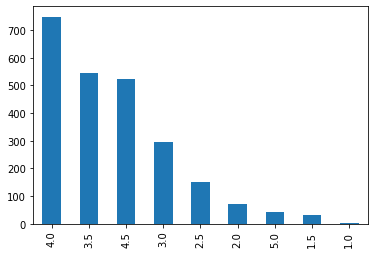

In [7]:
business.stars.value_counts().plot(kind='bar')

In [8]:
business['attributes'] = business['attributes'].apply(lambda x: ast.literal_eval(x))

In [9]:
attributes = []

for each in business['attributes']:
    attributes.extend(each.keys())
    
attributes = set(attributes)
attributes = sorted(list(attributes))
print(len(attributes))

37


In [121]:
# for column_name in attributes:
#     business[column_name] = None 

In [10]:
business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


In [150]:
expanded_attributes = pd.json_normalize(business['attributes'])

In [151]:
expanded_columns = expanded_attributes.isnull().sum()[expanded_attributes.isnull().sum()<1000].index.to_list()
expanded_attributes = expanded_attributes[expanded_columns]

In [152]:
expanded_attributes['RestaurantsDelivery'] = expanded_attributes['RestaurantsDelivery'].apply(lambda x:1 if x=='True' else 0)
expanded_attributes['OutdoorSeating'] = expanded_attributes['OutdoorSeating'].apply(lambda x:1 if x=='True' else 0)
expanded_attributes['BusinessAcceptsCreditCards'] = expanded_attributes['BusinessAcceptsCreditCards'].apply(lambda x:1 if x=='True' else 0)
expanded_attributes['BikeParking'] = expanded_attributes['BikeParking'].apply(lambda x:1 if x=='True' else 0)
expanded_attributes['RestaurantsTakeOut'] = expanded_attributes['RestaurantsTakeOut'].apply(lambda x:1 if x=='True' else 0)
expanded_attributes['Caters'] = expanded_attributes['Caters'].apply(lambda x:1 if x=='True' else 0)
expanded_attributes['RestaurantsReservations'] = expanded_attributes['RestaurantsReservations'].apply(lambda x:1 if x=='True' else 0)
expanded_attributes['RestaurantsGoodForGroups'] = expanded_attributes['RestaurantsGoodForGroups'].apply(lambda x:1 if x=='True' else 0)
expanded_attributes['HasTV'] = expanded_attributes['HasTV'].apply(lambda x:1 if x=='True' else 0)
expanded_attributes['GoodForKids'] = expanded_attributes['GoodForKids'].apply(lambda x:1 if x=='True' else 0)

In [153]:
expanded_attributes.head()

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Alcohol,Caters,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsAttire,HasTV,Ambience,GoodForKids,GoodForMeal,NoiseLevel
0,0,0,0,"{'garage': False, 'street': True, 'validated':...",1,1,1,u'free',u'none',1,0,0,NaN,0,NaN,0,NaN,NaN
1,1,1,1,"{u'valet': False, u'garage': None, u'street': ...",0,2,1,'free','full_bar',0,1,1,'casual',0,"{'touristy': False, 'hipster': False, 'romanti...",0,"{'dessert': True, 'latenight': None, 'lunch': ...",u'average'
2,0,0,1,"{'garage': False, 'street': True, 'validated':...",1,1,1,u'no',u'none',1,0,0,u'casual',1,"{'touristy': False, 'hipster': False, 'romanti...",1,"{'dessert': False, 'latenight': False, 'lunch'...",u'quiet'
3,1,1,1,"{'garage': False, 'street': False, 'validated'...",0,2,1,NaN,NaN,0,0,0,NaN,1,"{'touristy': False, 'hipster': False, 'romanti...",1,"{'dessert': False, 'latenight': False, 'lunch'...",NaN
4,1,0,1,"{'garage': False, 'street': True, 'validated':...",1,1,1,u'free',u'none',0,0,1,u'casual',1,"{'romantic': False, 'intimate': False, 'classy...",1,NaN,u'average'


In [205]:
expanded_attributes.RestaurantsPriceRange2 = expanded_attributes.RestaurantsPriceRange2.apply(lambda x: '1' if x=='None' else x)
expanded_attributes.RestaurantsPriceRange2.fillna(expanded_attributes.RestaurantsPriceRange2.mode()[0], inplace=True)
expanded_attributes.RestaurantsPriceRange2 = expanded_attributes.RestaurantsPriceRange2.astype('int')

In [206]:
expanded_attributes.RestaurantsPriceRange2.value_counts()

2    1460
1     844
3      91
4      17
Name: RestaurantsPriceRange2, dtype: int64

In [154]:
wifi = {
    "u'free'":'free',
    "'free'":'free',
    "'no'":'no',
    "'paid'":'paid',
    "u'no'":'no',
    "u'paid'":'paid',
    np.nan: 'no',
    'None':'no'
    }
expanded_attributes['WiFi'] = expanded_attributes.WiFi.map(wifi)

In [155]:
expanded_attributes.WiFi.value_counts()

no      1359
free    1037
paid      16
Name: WiFi, dtype: int64

In [156]:
alcohol = {
    "u'full_bar'":'full_bar',
    "'none'":'none',
    "'full_bar'":'full_bar',
    "u'beer_and_wine'":'beer_and_wine',
    "u'none'":'none',
    "'beer_and_wine'":'beer_and_wine',
    np.nan: 'none'
    }
expanded_attributes['Alcohol'] = expanded_attributes.Alcohol.map(alcohol)

In [157]:
expanded_attributes.Alcohol.value_counts()

none             1631
full_bar          676
beer_and_wine     105
Name: Alcohol, dtype: int64

In [158]:
attire = {
    "u'casual'":'casual',
    "'casual'":'casual',
    "u'dressy'":'dressy',
    "'dressy'":'dressy',
    "'formal'":'formal',
    "u'formal'":'formal',
    np.nan: 'casual'
    }
expanded_attributes['RestaurantsAttire'] = expanded_attributes.RestaurantsAttire.map(attire)

In [159]:
expanded_attributes.RestaurantsAttire.value_counts()

casual    2367
dressy      40
formal       5
Name: RestaurantsAttire, dtype: int64

In [160]:
noise = {
    "u'average'":'average',
    "u'quiet'":'quiet',
    "'average'":'average',
    "u'loud'":'loud',
    "u'very_loud'":'very_loud',
    "'quiet'":'quiet',
    "'loud'":'loud',
    "'very_loud'":'very_loud',
    np.nan: 'average'
    }
expanded_attributes['NoiseLevel'] = expanded_attributes.NoiseLevel.map(noise)

In [161]:
expanded_attributes.NoiseLevel.value_counts()

average      1905
quiet         273
loud          179
very_loud      55
Name: NoiseLevel, dtype: int64

In [162]:
expanded_attributes.Ambience = expanded_attributes.Ambience.apply(lambda x:ast.literal_eval(x) if not pd.isna(x) else {})

In [163]:
ambience_list=[]

def get_ambience(x):
    st = ''
    if x is None:
        return ''
    for k,v in x.items():
        if v:
            st += k + ' '
            ambience_list.append(k)
    return st[:-1]

expanded_attributes.Ambience = expanded_attributes.Ambience.apply(get_ambience)

In [164]:
expanded_attributes.Ambience.value_counts()

                                           783
casual                                     772
classy casual                              203
classy                                     178
trendy classy                               50
                                          ... 
intimate romantic                            1
hipster divey classy                         1
romantic intimate upscale classy casual      1
casual trendy intimate romantic              1
casual touristy trendy                       1
Name: Ambience, Length: 82, dtype: int64

In [167]:
expanded_attributes.GoodForMeal = expanded_attributes.GoodForMeal.apply(lambda x:ast.literal_eval(x) if not pd.isna(x) else {})

In [172]:
meal_list=[]

def get_meal(x):
    st = ''
    if x is None:
        return ''
    for k,v in x.items():
        if v:
            st += k + ' '
            meal_list.append(k)
    return st[:-1]

expanded_attributes.GoodForMeal = expanded_attributes.GoodForMeal.apply(get_meal)

In [176]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(expanded_attributes['Ambience'] + " " + expanded_attributes['GoodForMeal'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [177]:
tfidf_df

,breakfast,brunch,casual,classy,dessert,dinner,divey,hipster,intimate,latenight,lunch,romantic,touristy,trendy,upscale
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.447735,0.819166,0.358469,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.513779,0.000000,0.000000,0.588861,0.0,0.0,0.0,0.0,0.623918,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,0.0,0.0,0.513779,0.000000,0.000000,0.588861,0.0,0.0,0.0,0.0,0.623918,0.0,0.0,0.000000,0.0
2408,0.0,0.0,0.513779,0.000000,0.000000,0.588861,0.0,0.0,0.0,0.0,0.623918,0.0,0.0,0.000000,0.0
2409,0.0,0.0,0.393979,0.000000,0.000000,0.451554,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.800549,0.0
2410,0.0,0.0,0.513779,0.000000,0.000000,0.588861,0.0,0.0,0.0,0.0,0.623918,0.0,0.0,0.000000,0.0


In [180]:
expanded_attributes = pd.concat([expanded_attributes, tfidf_df], axis=1)

In [221]:
expanded_attributes = pd.concat([expanded_attributes, pd.get_dummies(expanded_attributes['WiFi'], prefix='Category')], axis=1)
expanded_attributes = pd.concat([expanded_attributes, pd.get_dummies(expanded_attributes['Alcohol'], prefix='Category')], axis=1)
expanded_attributes = pd.concat([expanded_attributes, pd.get_dummies(expanded_attributes['RestaurantsAttire'], prefix='Category')], axis=1)
expanded_attributes = pd.concat([expanded_attributes, pd.get_dummies(expanded_attributes['NoiseLevel'], prefix='Category')], axis=1)

In [223]:
expanded_attributes = expanded_attributes.drop(['BusinessParking','Ambience','GoodForMeal','WiFi','Alcohol','RestaurantsAttire','NoiseLevel'], axis=1, errors='ignore')

In [224]:
expanded_attributes.head()

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,Caters,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,GoodForKids,breakfast,brunch,casual,classy,dessert,dinner,divey,hipster,intimate,latenight,lunch,romantic,touristy,trendy,upscale,Category_free,Category_no,Category_paid,Category_beer_and_wine,Category_full_bar,Category_none,Category_casual,Category_dressy,Category_formal,Category_average,Category_loud,Category_quiet,Category_very_loud
0,0,0,0,1,1,1,1,0,0,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1,0,0,1,0,0,0
1,1,1,1,0,2,1,0,1,1,0,0,0.0,0.0,0.000000,0.447735,0.819166,0.358469,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0,0,1,0,0,0
2,0,0,1,1,1,1,1,0,0,1,1,0.0,0.0,0.513779,0.000000,0.000000,0.588861,0.0,0.0,0.0,0.0,0.623918,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,1,1,1,0,2,1,0,0,0,1,1,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0,1,0,0,0
4,1,0,1,1,1,1,0,0,1,1,1,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1,0,0,1,0,0,0


In [246]:
business_attributes = business[['business_id','stars','categories']].reset_index(drop=True)
business_attributes = pd.concat([business_attributes, expanded_attributes], axis=1)

In [256]:
def remove_punctuation(text):
    text_without_punctuation = re.sub(r'[^\w\s]', '', text)
    text_without_punctuation = re.sub(r'\s+', ' ', text_without_punctuation).strip()
    return text_without_punctuation

In [259]:
category_vectorizer = TfidfVectorizer()
category_matrix = category_vectorizer.fit_transform(business_attributes['categories'])
tfidf_category = pd.DataFrame(category_matrix.toarray(), columns=category_vectorizer.get_feature_names_out())

In [260]:
tfidf_category

,acai,active,adult,advising,afghan,african,airport,american,apartments,appliances,arabic,arcades,argentine,armenian,art,arts,asian,australian,automotive,axe,bagels,bakeries,bangladeshi,banks,bar,barbeque,barbers,bars,basque,bath,beaches,beauty,beer,belgian,belt,beverage,blues,boat,boating,books,bookstores,bowling,bowls,brasseries,brazilian,breakfast,breweries,brewpubs,british,brunch,bubble,buffets,buildings,burgers,burmese,butcher,cafe,cafes,cafeteria,cajun,cake,cakes,cambodian,candy,cannabis,cantonese,cards,caribbean,caterers,centers,charters,cheese,cheesesteaks,chefs,chicken,chinese,chips,chocolatiers,cideries,classes,clinics,clothing,clubs,cocktail,coffee,colleges,colombian,comedy,comfort,consignment,convenience,conveyor,cooking,cosmetics,costumes,court,crafts,cream,credit,creole,creperies,cuban,cuisine,cupcakes,curry,custom,dance,decor,delicatessen,delis,delivery,dentistry,dentists,department,desserts,dim,diners,dinner,distilleries,dive,do,dogs,dominican,donuts,dvds,eastern,eatertainment,education,empanadas,entertainment,estate,ethiopian,ethnic,european,event,events,falafel,farmers,fashion,fast,festivals,filipino,financial,fish,fitness,flavor,flowers,food,free,french,frozen,fruits,furniture,fusion,galleries,game,games,garden,gardening,gardens,gas,gastropubs,gay,gelato,general,georgian,german,gift,gifts,gluten,golf,goods,government,greek,grocery,hainan,hair,halal,halls,hawaiian,health,himalayan,historical,home,honduran,hong,hookah,hospitals,hot,hotels,hungarian,iberian,ice,imported,indian,indonesian,instruction,international,internet,iranian,irish,israeli,it,italian,izakaya,japanese,jazz,jewelry,juice,karaoke,kebab,kitchen,kong,korean,kosher,landmarks,laotian,latin,lebanese,lessons,life,live,local,lounges,magazines,mags,malaysian,market,markets,mass,meat,media,medical,mediterranean,men,mex,mexican,middle,mini,modern,mongolian,moroccan,museums,music,nepalese,new,newspapers,nightlife,noodles,nurseries,nutritionists,organic,paint,pakistani,pan,parks,party,pasta,patisserie,performing,persian,personal,peruvian,pets,pizza,planning,plates,poke,polish,pool,pop,portuguese,pot,poutineries,pretzels,print,pub,public,pubs,puerto,ramen,raw,real,records,recreation,rental,restaurants,reupholstery,rican,rinks,roasteries,rooms,russian,salad,sales,salons,salvadoran,sandwiches,sardinian,scandinavian,schools,seafood,senegalese,services,shanghainese,shaved,shop,shopping,shops,shuttles,sicilian,singaporean,sip,skating,small,smokehouse,smoothies,social,soul,soup,southern,spaces,spanish,spas,specialty,spirits,sporting,sports,stands,stationery,stations,steakhouses,store,stores,street,strip,style,sum,supplies,supply,sushi,szechuan,tabletop,tacos,taiwanese,tapas,taxis,tea,teppanyaki,tex,thai,theater,themed,throwing,ticket,tobacco,tours,toy,traditional,train,transportation,travel,trinidadian,trucks,turkish,ukrainian,unions,universities,unofficial,up,used,uzbek,vegan,vegetarian,veggies,vendors,venezuelan,venues,video,videos,vietnamese,vintage,vinyl,visitor,waffles,watches,whiskey,wine,wineries,wings,wraps,yelp,yogurt,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.392612,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.537122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325338,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [261]:
business_attributes = pd.concat([business_attributes, tfidf_category], axis=1)

In [263]:
business_attributes.drop('categories',axis=1,inplace=True)

In [268]:
business_attributes.set_index('business_id',inplace=True)

In [269]:
business_attributes.head()

,stars,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,Caters,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,GoodForKids,breakfast,brunch,casual,classy,dessert,dinner,divey,hipster,intimate,latenight,lunch,romantic,touristy,trendy,upscale,Category_free,Category_no,Category_paid,Category_beer_and_wine,Category_full_bar,Category_none,Category_casual,Category_dressy,Category_formal,Category_average,Category_loud,Category_quiet,Category_very_loud,acai,active,adult,advising,afghan,african,airport,american,apartments,appliances,arabic,arcades,argentine,armenian,art,arts,asian,australian,automotive,axe,bagels,bakeries,bangladeshi,banks,bar,barbeque,barbers,bars,basque,bath,beaches,beauty,beer,belgian,belt,beverage,blues,boat,boating,books,bookstores,bowling,bowls,brasseries,brazilian,breakfast,breweries,brewpubs,british,brunch,bubble,buffets,buildings,burgers,burmese,butcher,cafe,cafes,cafeteria,cajun,cake,cakes,cambodian,candy,cannabis,cantonese,cards,caribbean,caterers,centers,charters,cheese,cheesesteaks,chefs,chicken,chinese,chips,chocolatiers,cideries,classes,clinics,clothing,clubs,cocktail,coffee,colleges,colombian,comedy,comfort,consignment,convenience,conveyor,cooking,cosmetics,costumes,court,crafts,cream,credit,creole,creperies,cuban,cuisine,cupcakes,curry,custom,dance,decor,delicatessen,delis,delivery,dentistry,dentists,department,desserts,dim,diners,dinner,distilleries,dive,do,dogs,dominican,donuts,dvds,eastern,eatertainment,education,empanadas,entertainment,estate,ethiopian,ethnic,european,event,events,falafel,farmers,fashion,fast,festivals,filipino,financial,fish,fitness,flavor,flowers,food,free,french,frozen,fruits,furniture,fusion,galleries,game,games,garden,gardening,gardens,gas,gastropubs,gay,gelato,general,georgian,german,gift,gifts,gluten,golf,goods,government,greek,grocery,hainan,hair,halal,halls,hawaiian,health,himalayan,historical,home,honduran,hong,hookah,hospitals,hot,hotels,hungarian,iberian,ice,imported,indian,indonesian,instruction,international,internet,iranian,irish,israeli,it,italian,izakaya,japanese,jazz,jewelry,juice,karaoke,kebab,kitchen,kong,korean,kosher,landmarks,laotian,latin,lebanese,lessons,life,live,local,lounges,magazines,mags,malaysian,market,markets,mass,meat,media,medical,mediterranean,men,mex,mexican,middle,mini,modern,mongolian,moroccan,museums,music,nepalese,new,newspapers,nightlife,noodles,nurseries,nutritionists,organic,paint,pakistani,pan,parks,party,pasta,patisserie,performing,persian,personal,peruvian,pets,pizza,planning,plates,poke,polish,pool,pop,portuguese,pot,poutineries,pretzels,print,pub,public,pubs,puerto,ramen,raw,real,records,recreation,rental,restaurants,reupholstery,rican,rinks,roasteries,rooms,russian,salad,sales,salons,salvadoran,sandwiches,sardinian,scandinavian,schools,seafood,senegalese,services,shanghainese,shaved,shop,shopping,shops,shuttles,sicilian,singaporean,sip,skating,small,smokehouse,smoothies,social,soul,soup,southern,spaces,spanish,spas,specialty,spirits,sporting,sports,stands,stationery,stations,steakhouses,store,stores,street,strip,style,sum,supplies,supply,sushi,szechuan,tabletop,tacos,taiwanese,tapas,taxis,tea,teppanyaki,tex,thai,theater,themed,throwing,ticket,tobacco,tours,toy,traditional,train,transportation,travel,trinidadian,trucks,turkish,ukrainian,unions,universities,unofficial,up,used,uzbek,vegan,vegetarian,veggies,vendors,venezuelan,venues,video,videos,vietnamese,vintage,vinyl,visitor,waffles,watches,whiskey,wine,wineries,wings,wraps,yelp,yogurt,yourself
business_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [270]:
similarity_scores = cosine_similarity(business_attributes)

In [271]:
similarity_scores.shape

(2412, 2412)

In [272]:
similarity_scores = np.matrix(similarity_scores)
np.fill_diagonal(similarity_scores,0.00)

In [274]:
similarity_scores

matrix([[0.        , 0.77838242, 0.83310836, ..., 0.79786266, 0.78910938,
         0.87396734],
        [0.77838242, 0.        , 0.71252867, ..., 0.85709032, 0.73613931,
         0.85246574],
        [0.83310836, 0.71252867, 0.        , ..., 0.828247  , 0.86821591,
         0.8663624 ],
        ...,
        [0.79786266, 0.85709032, 0.828247  , ..., 0.        , 0.84673031,
         0.8480201 ],
        [0.78910938, 0.73613931, 0.86821591, ..., 0.84673031, 0.        ,
         0.89209598],
        [0.87396734, 0.85246574, 0.8663624 , ..., 0.8480201 , 0.89209598,
         0.        ]])

In [277]:
match_score = pd.DataFrame(similarity_scores, index=business_attributes.index, columns=business_attributes.index)

In [278]:
match_score

business_id             MTSW4McQd7CbVtyjqoe9mw  MUTTqe8uqyMdBl186RmNeA  \
business_id                                                              
MTSW4McQd7CbVtyjqoe9mw                0.000000                0.778382   
MUTTqe8uqyMdBl186RmNeA                0.778382                0.000000   
ROeacJQwBeh05Rqg7F6TCg                0.833108                0.712529   
aPNXGTDkf-4bjhyMBQxqpQ                0.757923                0.813494   
ppFCk9aQkM338Rgwpl2F5A                0.801705                0.774442   
...                                        ...                     ...   
bmJgvpuf2GBXd62ELK0Q2w                0.813593                0.788429   
TKPAyOWcexkpVHPCdYTNmQ                0.787531                0.847559   
auwFZzfhe2pvFw43OfsAfw                0.797863                0.857090   
wVxXRFf10zTTAs11nr4xeA                0.789109                0.736139   
WnT9NIzQgLlILjPT0kEcsQ                0.873967                0.852466   

business_id             ROeacJQwBeh05Rqg7F6TCg  aPNXGTDkf-4bjhyMBQxqpQ  \
business_id                                                              
MTSW4McQd7CbVtyjqoe9mw                0.833108                0.757923   
MUTTqe8uqyMdBl186RmNeA                0.712529                0.813494   
ROeacJQwBeh05Rqg7F6TCg                0.000000                0.808004   
aPNXGTDkf-4bjhyMBQxqpQ                0.808004                0.000000   
ppFCk9aQkM338Rgwpl2F5A                0.796489                0.805057   
...                                        ...                     ...   
bmJgvpuf2GBXd62ELK0Q2w                0.889756                0.865026   
TKPAyOWcexkpVHPCdYTNmQ                0.832918                0.856151   
auwFZzfhe2pvFw43OfsAfw                0.828247                0.898825   
wVxXRFf10zTTAs11nr4xeA                0.868216                0.870187   
WnT9NIzQgLlILjPT0kEcsQ                0.866362                0.844743   

business_id             ppFCk9aQkM338Rgwpl2F5A  3BJxm-HnvzdwD1zjmSbmyQ  \
business_id                                                              
MTSW4McQd7CbVtyjqoe9mw                0.801705                0.801097   
MUTTqe8uqyMdBl186RmNeA                0.774442                0.779339   
ROeacJQwBeh05Rqg7F6TCg                0.796489                0.803878   
aPNXGTDkf-4bjhyMBQxqpQ                0.805057                0.772119   
ppFCk9aQkM338Rgwpl2F5A                0.000000                0.876482   
...                                        ...                     ...   
bmJgvpuf2GBXd62ELK0Q2w                0.867006                0.871718   
TKPAyOWcexkpVHPCdYTNmQ                0.821118                0.793401   
auwFZzfhe2pvFw43OfsAfw                0.793284                0.782313   
wVxXRFf10zTTAs11nr4xeA                0.844688                0.849669   
WnT9NIzQgLlILjPT0kEcsQ                0.904326                0.903591   

business_id             bTve2mwLk5Zc01vRKqc2KQ  _T0cPZE2ZJOTTlYYKMP64Q  \
business_id                                                              
MTSW4McQd7CbVtyjqoe9mw                0.858393                0.886018   
MUTTqe8uqyMdBl186RmNeA                0.747611                0.809735   
ROeacJQwBeh05Rqg7F6TCg                0.874918                0.863168   
aPNXGTDkf-4bjhyMBQxqpQ                0.788008                0.856800   
ppFCk9aQkM338Rgwpl2F5A                0.806579                0.900435   
...                                        ...                     ...   
bmJgvpuf2GBXd62ELK0Q2w                0.821548                0.871892   
TKPAyOWcexkpVHPCdYTNmQ                0.798150                0.844652   
auwFZzfhe2pvFw43OfsAfw                0.801000                0.855907   
wVxXRFf10zTTAs11nr4xeA                0.759892                0.849295   
WnT9NIzQgLlILjPT0kEcsQ                0.840031                0.918805   

business_id             dChRGpit9fM_kZK5pafNyA  QWqKTWQ2OiDgo3dzNkpung  \
business_id                                                              


In [281]:
match_score.to_csv('../saved/content_based_scores.csv')